In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None,names=["Population", "Profit"])
print(data)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


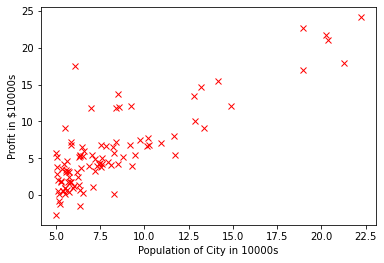

In [3]:
x=data.iloc[:,0] 
y=data.iloc[:,1]

plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
plt.plot(x, y, 'x', color='red');


In [4]:
def costFunction(x, y, theta):
    meanErrorSquared = np.power(((x * theta.T) - y), 2) #(h0 -y)^2
    return np.sum(meanErrorSquared) / (2 * len(x)) # sum of mean error squared * 1/2m

In [5]:
data.insert(0, 'X0', 1)

In [6]:
X = data.iloc[:,0:2] #X0 and Population (Training data)
Y = data.iloc[:,2:3] #Profit (target variable)
theta = np.matrix(np.array([0,0])) # theata matrix with 0 value
#print(X)
#print(Y)
#print(theta)


In [7]:
mat1 = np.matrix(X.values)
mat2 = np.matrix(Y.values)
#print(mat1)
#print(mat2)

In [8]:
costFunction(mat1,mat2,theta)


32.072733877455676

In [9]:
def gradientDescent(x, y, theta, alpha, iterations):
    temp = np.matrix(np.zeros(theta.shape)) #copy of theta matrix with value 0 
    featureCount = int(theta.ravel().shape[1]) # feature count including dummy X0 or number of thetas values
    costArray = np.zeros(iterations) #initialize cost array with zeros
    
    for a in range(iterations):
        error = (x * theta.T) - y #predicted- actual or h0 - y 
        for b in range(featureCount):
            derivative = np.multiply(error, x[:,b]) #error * feature value or (h0 - y)x
            temp[0,b] = theta[0,b] - ((alpha / len(x)) * np.sum(derivative)) #UpdatedTheta= PrevTheta - ((alpha/m) * sum of derivative )   
        theta = temp #update theta
        costArray[a] = costFunction(x, y, theta) 
        
    return theta, costArray

In [12]:
mat1.shape,mat2.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [10]:
iterations = 2000
alpha = 0.01
gd, cost = gradientDescent(mat1, mat2, theta, alpha, iterations)
gd

matrix([[-3.78806857,  1.18221277]])

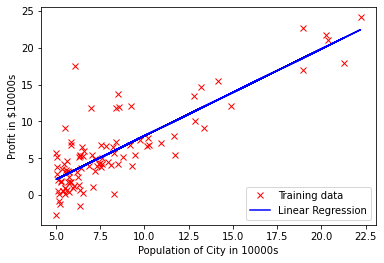

In [11]:
y = gd[0, 0] + (gd[0, 1] * x)  #y= theta0 + theta1 * X
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
plt.plot(data.Population, data.Profit, 'x', color='red', label="Training data");
plt.plot(x, y, 'r', label='Linear Regression',color="blue")
plt.legend(loc=4)